## 1. load in data

In [1]:
import pandas as pd
terror = pd.read_csv(r'E:\WEMUST\Opensourcetools\final\globalterrorismdb.csv',encoding='ISO-8859-1', low_memory = False)

In [2]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


## 2. remain and rename the relavant columns

In [3]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
#df[['Killed','Wounded']].fillna(value=0)

In [4]:
df.eval('Casualities = Killed + Wounded' , inplace=True)
#df['Casualities'] = df['Killed'] + df['Wounded']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         209706 non-null  int64  
 1   Month        209706 non-null  int64  
 2   Day          209706 non-null  int64  
 3   Country      209706 non-null  object 
 4   Region       209706 non-null  object 
 5   city         209280 non-null  object 
 6   latitude     205015 non-null  float64
 7   longitude    205014 non-null  float64
 8   AttackType   209706 non-null  object 
 9   Killed       197179 non-null  float64
 10  Wounded      189770 non-null  float64
 11  Target       209071 non-null  object 
 12  Summary      143586 non-null  object 
 13  Group        209706 non-null  object 
 14  Target_type  209706 non-null  object 
 15  Weapon_type  209706 non-null  object 
 16  Motive       55058 non-null   object 
 17  Casualities  189049 non-null  float64
dtypes: float64(5), int64(3),

In [6]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              426
latitude         4691
longitude        4692
AttackType          0
Killed          12527
Wounded         19936
Target            635
Summary         66120
Group               0
Target_type         0
Weapon_type         0
Motive         154648
Casualities     20657
dtype: int64

In [7]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,197179.000000,189770.000000,189049.000000
mean,2004.800993,6.455285,15.527930,23.358696,30.416738,2.431030,3.085872,5.233543
std,13.519321,3.387098,8.801104,18.137061,56.113029,11.340882,40.916175,46.734028
min,1970.000000,0.000000,0.000000,-53.154613,-176.176447,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.510046,8.748117,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,31.300213,43.746215,0.000000,0.000000,1.000000
75%,2015.000000,9.000000,23.000000,34.557022,68.835918,2.000000,2.000000,4.000000
max,2020.000000,12.000000,31.000000,74.633553,179.366667,1700.000000,10878.000000,12263.000000


## 3. Data Visualization

### 3. 1 Draw Countplot in Seaborn to show the counts of terror attacks in each year

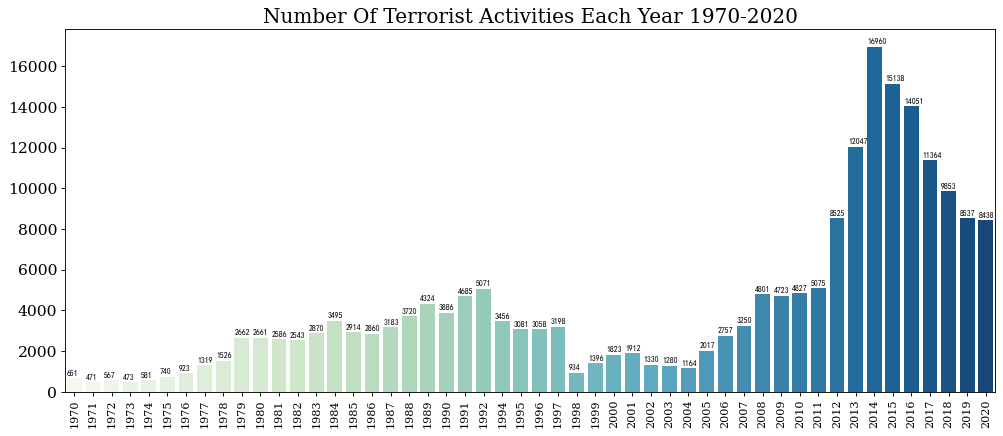

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,6), dpi=80, edgecolor='white')
sns.countplot(x ='Year',data=terror, palette='GnBu') 
ax.set_title("Number Of Terrorist Activities Each Year 1970-2020",fontsize = 18,fontproperties = 'serif')
plt.xticks(rotation=90,fontproperties = 'serif')
plt.yticks(fontsize =14,fontproperties = 'serif')
ax.set_xlabel('')
ax.set_ylabel('') 
#显示具体数值
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+80), color='black', size=7, va='bottom')
plt.show()
#fig.savefig('NumberEachYear.png',bbox_inches = 'tight')

### 3.2 Sort the number of terrorist attacks by region

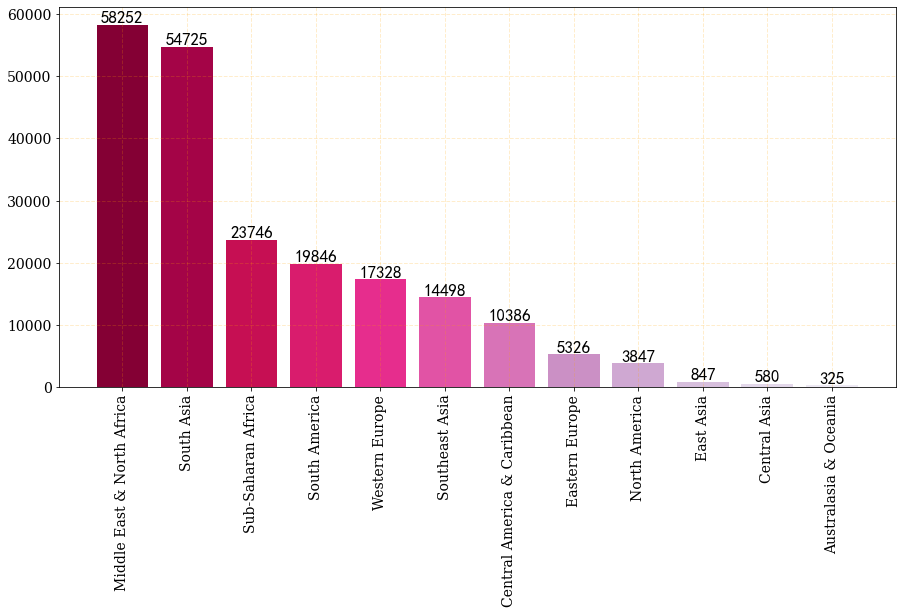

In [10]:
#calculate the frequency of the attacks in each region and rename the columns
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']


###fig,ax = plt.subplots(figsize=(15,7))
#rename the name and number
name2 = region_attacks.Region
num2 = region_attacks['Total Attacks']

#create a figure and define the color of the background
fig = plt.figure(figsize = (15,7), edgecolor='white') 

#open the grid
plt.grid(color='orange',linestyle='--',linewidth=1,alpha=0.2) 

#define the colors using palette from seaborn package
colors = sns.color_palette('PuRd_r',12)

plt.bar(name2, num2, color = colors)
plt.xticks(rotation=90,fontsize = 14,fontproperties = 'serif')
plt.yticks(fontsize = 14,fontproperties = 'serif')
#plt.title('Number of Total Attacks in Each Region', size = 20, fontproperties = 'serif')
#plot vertical barplot
#sns.set(rc={‘figure.figsize’:(10,5)})
#ax = sns.barplot(x=’year’, y=’passengers’, data=year_flights)
#ax.set(title=’Total Number of Passengers Yearly’) # title barplot# label each bar in barplot
#for p in ax.patches: # get the height of each bar height = 
 #   p.get_height() # adding text to each bar 
  #  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar 
   #         y = height+100, # y-coordinate position of data label, padded 100 above bar 
    #        s = ‘{:.0f}’.format(height), # data label, formatted to ignore decimals 
     #       ha = ‘center’) # sets horizontal alignment (ha) to center
#
for a, b in zip(name2, num2):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=17)
plt.show()
#sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r')
#edgecolor=sns.color_palette('dark',10))
#fig.savefig('Total_Attacks_Region.png',bbox_inches = 'tight')

### 3.3 Draw Barplot of the 10 Countries with the highest casualties

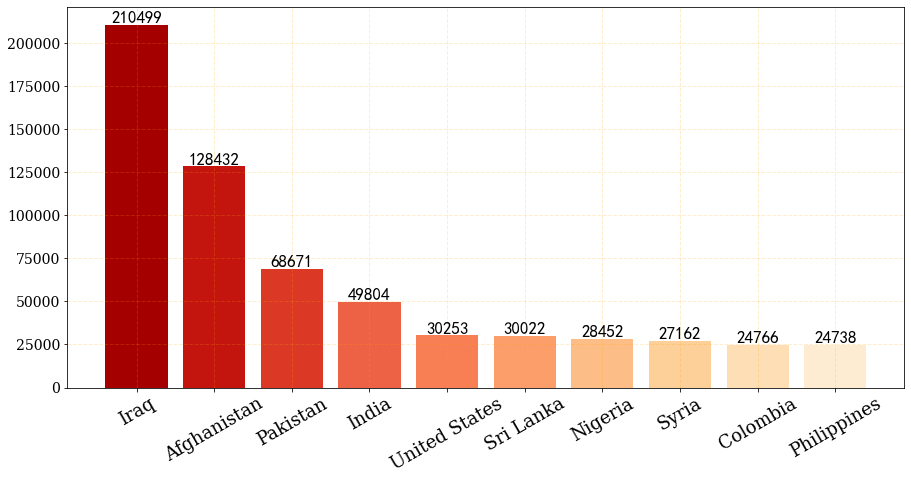

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#use the groupby() function to separate the data by 'Country' and calculate the number of total casualities 
#with sum() function. use the sort_values() function to sort the values in descending order and 
#reserve the top 10 countries.
count_cas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:10]

#rename name and number in list format
name = count_cas.Country.tolist()
num = count_cas.Casualities.tolist()

###fig,ax = plt.subplots(figsize=(15,7))
#create a figure and define the color of the background
fig = plt.figure(figsize = (15,7), edgecolor='white') 

#open the grid
plt.grid(color='orange',linestyle='--',linewidth=1,alpha=0.2) 

#define the colors using palette from seaborn package
colors = sns.color_palette('OrRd_r',10)

#plot vertical barplot
plt.bar(name, num, color = colors)

#define the style of x, y label and the title
plt.xticks(rotation=30,fontsize = 18,fontproperties = 'serif')
plt.yticks(fontsize =14,fontproperties = 'serif')
#plt.title('Number of Total Casualities in Each Country', size = 20, fontproperties = 'serif')

#label each bar in barplot. 
#x = a refers to x-coordinate position of data label, y = b refers to y-coordinate.
#s  = '%.0f' % b refers to the added data label, formatted to ignore decimals
#ha = 'center' sets horizontal alignment to center
#va = 'bottom', control the distance between label and the axis
for a, b in zip(name, num):
    plt.text(a, b, '%.0f' % b, ha='center', va = 'bottom',fontsize=17)
plt.show()

#save figure, bbox_inches = 'tight' means keeping the whole figure including the axis and the labels, 
#in case the labels below are cut after saving.
#fig.savefig('Total_Casualities_Country.png',bbox_inches = 'tight')

### 3.4 Show the attack types of the 10 countries most affected by terrorism attacks with horizontal stacking bar chart

In [11]:
x = df.Country.value_counts()[:10]
name = x.index.to_list()
tf = df[df.Country.isin(name)]

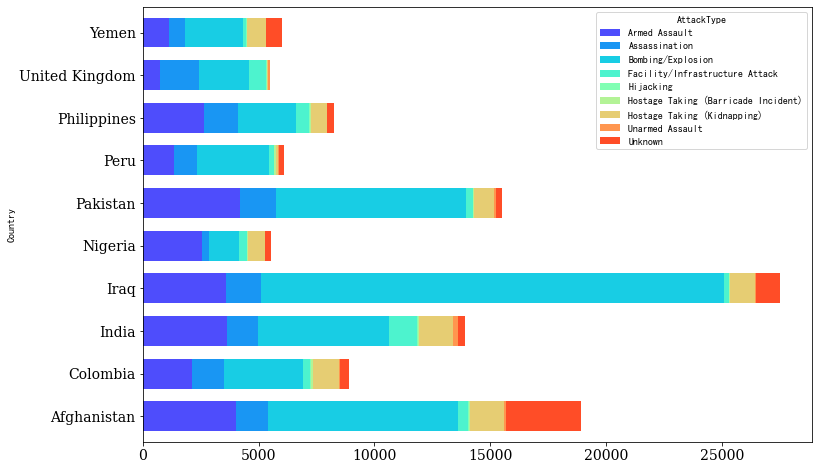

In [12]:
#plt.rcParams['font.sans-serif'] = 'serif'
pd.crosstab(tf.Country,tf.AttackType).plot.barh(stacked=True,width=0.7,color=sns.color_palette('rainbow',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(fontsize =14,fontproperties = 'serif')
plt.yticks(fontsize =14,fontproperties = 'serif')
plt.show()
#fig.savefig('AttackType_10Country.png',bbox_inches = 'tight')

### 3.5 Draw the pie chart to see the percentages of each target type

In [13]:
targ = df.Target_type.value_counts().to_frame().reset_index()
name22 = targ.index.to_list()
targ.columns = ['Targettype', 'Count']

In [14]:
targ

,Targettype,Count
0,Private Citizens & Property,51985
1,Military,34131
2,Police,28568
3,Government (General),23828
4,Business,22169
5,Unknown,7174
6,Transportation,7173
7,Utilities,6328
8,Religious Figures/Institutions,5107
9,Educational Institution,4761


In [15]:
targ.Count[11:].sum()

14680

In [16]:
targ2 = targ[:11]

In [17]:
targ2

,Targettype,Count
0,Private Citizens & Property,51985
1,Military,34131
2,Police,28568
3,Government (General),23828
4,Business,22169
5,Unknown,7174
6,Transportation,7173
7,Utilities,6328
8,Religious Figures/Institutions,5107
9,Educational Institution,4761


In [18]:
df2 = pd.DataFrame([['Others', 14680]], columns=('Targettype','Count'))
#targ2.loc[10]=['Others', 14680] 
frames = [targ2, df2]
result = pd.concat(frames)
result
#targ2.concat(df2, ignore_index=True)
#mid = pd.DataFrame({"Targettype":'Others',"Count":14680},name="10")


,Targettype,Count
0,Private Citizens & Property,51985
1,Military,34131
2,Police,28568
3,Government (General),23828
4,Business,22169
5,Unknown,7174
6,Transportation,7173
7,Utilities,6328
8,Religious Figures/Institutions,5107
9,Educational Institution,4761


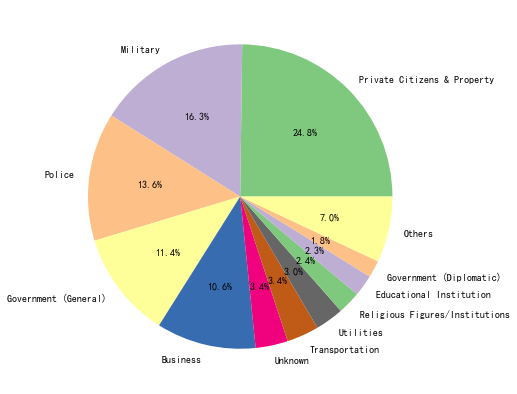

In [19]:
plt.figure(figsize = (15,7))
plt.pie(result.Count, labels=result.Targettype, autopct='%3.1f%%', colors = sns.color_palette('Accent',13))
plt.show()
#plt.savefig('Pie.png',bbox_inches = 'tight')
#plt.pie(targ, labels=name22, autopct=my_autopct)
#ax.pie(df[col], labels=df.index, autopct=my_autopct, colors=colors)